# 【課題】糖尿病の進行状況を予測（回帰）しよう

## データを読み込む

まずは、最初のセルを実行し、データを読み込んでください。今回はscikit-learnに標準で入っているデータを使います。

In [1]:
# scikit-learnの糖尿病のデータセットを読み込む（変更しないでください）
from sklearn import datasets
diabetes_data = datasets.load_diabetes()

読み込んだデータについて確認します。

In [2]:
# データセットのDESCRを確認する（変更しないでください）
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
# 読み込んだデータが何行何列かをshapeで確認する（変更しないでください）
print(diabetes_data.data.shape)
print(diabetes_data.target.shape)

(442, 10)
(442,)


このデータは、糖尿病患者に関する10種類のデータを持っています。主要なもののみ、以下に概要を記載します。

- `age`：年齢
- `sex`：性別
- `bmi`：身長と体重から計算されたBMI
- `bp`：血圧の平均

目的変数には、各患者の1年後の糖尿病の進行状況を数値化したものが入っています。

今回は `bmi`（BMI）と `bp`（血圧）を説明変数として採用します。スライスを使い、`diabetes_data` の `data` と `target` から、それぞれ `X` と `y` を作成しましょう。なお、今回はscikit-learnが持つデータを読み込んでいるので、データはndarray型です。一度Pandasに変更してからスライスでも良いですが、ここではndarrayのまま `data` からスライスしています。

In [4]:
# スライスして X と y を作成する（変更しないでください）
X = diabetes_data.data[:, 2:4]
y = diabetes_data.target

`X` の最初の10件を表示して、データがどのようになっているかを確認します。

In [5]:
# 特徴量（説明変数）の最初の10件をスライスして表示する
# （以下にコードを書いてください）

print(X[:10])

[[ 0.06169621  0.02187239]
 [-0.05147406 -0.02632753]
 [ 0.04445121 -0.00567042]
 [-0.01159501 -0.03665608]
 [-0.03638469  0.02187239]
 [-0.04069594 -0.01944183]
 [-0.04716281 -0.01599898]
 [-0.00189471  0.06662945]
 [ 0.06169621 -0.04009893]
 [ 0.03906215 -0.03321323]]


このデータは最初から正規化されているため、このような数値となっています。

`y` のデータも表示してみましょう。

In [6]:
# 目的変数の最初の10件をスライスして表示する
# （以下にコードを書いてください）

print(y[:10])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


`y`（糖尿病の進行状況）の数値がどのように計測、あるいは計算されたものかについての説明は公表されていませんが、数値が大きいほど、糖尿病が進行しているものと認識してください。

## データの前処理について

今回は、とくに何か前処理を行なう必要はありませんので、スキップして進めます。

## データを訓練データとテストデータに分ける

X および y を訓練データとテストデータに分けましょう。その際、訓練データ8割、テストデータ2割としてください。また、並び順がランダムになるよう、分割してください。

In [7]:
# 訓練データ8割、テストデータ2割に分割する
# （以下にコードを書いてください）

from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割（8:2の比率、ランダムに分割）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 分割結果の確認
print(f"訓練データの形状: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"テストデータの形状: X_test={X_test.shape}, y_test={y_test.shape}")
print(f"全体のデータ数: {len(X)}")
print(f"訓練データ数: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"テストデータ数: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


訓練データの形状: X_train=(353, 2), y_train=(353,)
テストデータの形状: X_test=(89, 2), y_test=(89,)
全体のデータ数: 442
訓練データ数: 353 (79.9%)
テストデータ数: 89 (20.1%)


## モデルを作成して訓練する

ここでは、レッスン本文でも利用した「線形回帰モデル」（`LinearRegression`）を使います。また、作成したモデルに訓練データを渡して、学習を行ないます。

In [8]:
# LinearRegressionの線形回帰モデルを作成する
# （以下にコードを書いてください）

from sklearn.linear_model import LinearRegression

# 線形回帰モデルを作成
model = LinearRegression()

# 訓練データを使って訓練を行なう
# （以下にコードを書いてください）

model.fit(X_train, y_train)

LinearRegression()

## 期待する性能が出たかを評価する

予測を実行しましょう。

In [9]:
# テストデータを使って予測（回帰）を実行する
# （以下にコードを書いてください）

y_pred = model.predict(X_test)

# model.predict(X_test)：学習済みモデルにテストデータの特徴量を渡して予測を実行
# y_pred：予測結果（予測された糖尿病進行状況の数値）

モデルの評価を行なううえで、まずは予測値と正解値の散布図を作ります。

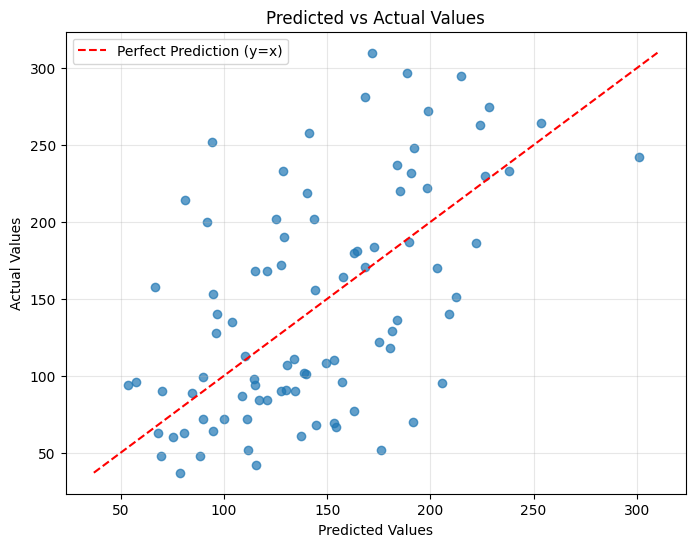

In [16]:
# 横軸が予測値、縦軸は正解値でプロットした散布図を表示する
# （以下にコードを書いてください）

import matplotlib.pyplot as plt

# 横軸が予測値、縦軸は正解値でプロットした散布図を表示する
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.7)
plt.xlabel('Predicted Values')  # 予測値
plt.ylabel('Actual Values')     # 正解値
plt.title('Predicted vs Actual Values')  # 予測値 vs 正解値　の散布図

# 理想的な予測線（y=x）を追加
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction (y=x)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

正解値と予測値の平均二乗誤差を求めます。

In [ ]:
# 正解値と予測値の平均二乗誤差を計算して表示する
# （以下にコードを書いてください）

# from sklearn.metrics：scikit-learnのmetricsモジュールからimport mean_squared_error：mean_squared_errorという関数を読み込む
# mean_squared_errorとは平均二乗誤差（Mean Squared Error, MSE）を計算する関数

from sklearn.metrics import mean_squared_error

# 正解値と予測値の平均二乗誤差を計算して表示する
mse = mean_squared_error(y_test, y_pred)
print(f"平均二乗誤差 (MSE): {mse:.2f}")

平均二乗誤差 (MSE): 3740.51


平均二乗誤差の平方根を計算し、正解値と予測値のズレの大きさを求めましょう。

In [20]:
# 平均二乗誤差の平方根を計算して表示する
# （以下にコードを書いてください）

# import numpy：NumPyライブラリを読み込む。as np：numpyをnpという短い名前で使えるようにする
import numpy as np

# 平均二乗誤差の平方根を計算
rmse = np.sqrt(mse)
print(f"平均二乗誤差の平方根 (RMSE): {rmse:.2f}")


平均二乗誤差の平方根 (RMSE): 61.16
